In [3]:
! pip install kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download mohamedhanyyy/chest-ctscan-images

 92% 109M/119M [00:01<00:00, 67.6MB/s] 
100% 119M/119M [00:01<00:00, 76.9MB/s]


In [8]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from zipfile import ZipFile

In [9]:
zipfile = "chest-ctscan-images.zip"
with ZipFile(zipfile, 'r') as zip:
  zip.extractall()

In [20]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [21]:
# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

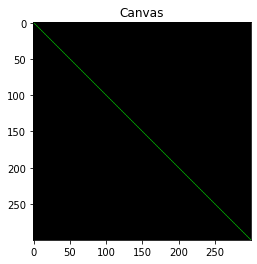

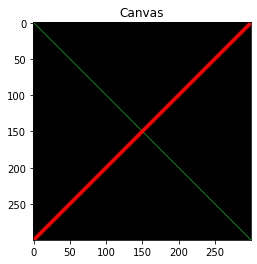

In [22]:
# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

# draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

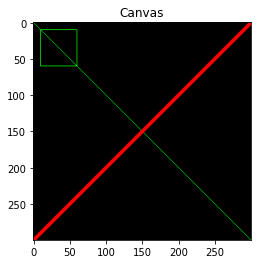

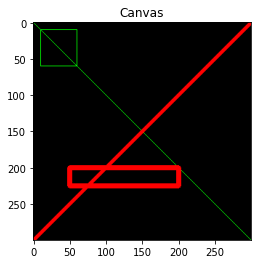

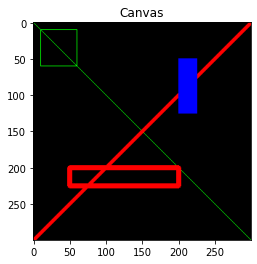

In [23]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt_imshow("Canvas", canvas)

# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

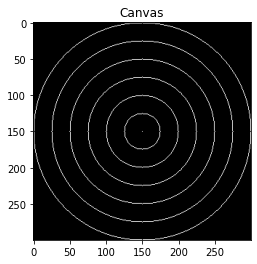

In [24]:
# re-initialize our canvas as an empty array, then compute the
# center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 150 pixels in 25
# pixel increments
for r in range(0, 175, 25):
	# draw a white circle with the current radius size
	cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

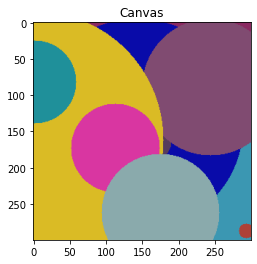

In [25]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our screen
plt_imshow("Canvas", canvas)

In [26]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/Data/test/adenocarcinoma/000108 (3).png"
}

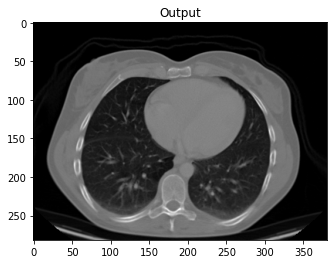

In [27]:
# load the input image from disk
image = cv2.imread(args["image"])

cv2.rectangle(image, (400, 200), (1200, 600), (0, 255, 255), -1)
cv2.rectangle(image, (450, 250), (1150, 550), (0, 0, 255), 1)

# show the output image
plt_imshow("Output", image)